<a href="https://colab.research.google.com/github/PJ779/StockMarket_Tesla_ARIMA/blob/main/StockPrice_tesla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import zipfile

In [ ]:
with zipfile.ZipFile('/content/archive (4).zip', 'r') as zip_ref:
  zip_ref.extractall('/content')

In [ ]:
df = pd.read_csv('/content/Tesla.csv - Tesla.csv.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988
1691,3/17/2017,264.000000,265.329987,261.200012,261.500000,6475900,261.500000


In [ ]:
df.isnull().any()

,0
Date,False
Open,False
High,False
Low,False
Close,False
Volume,False
Adj Close,False


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.describe()

,Date,Open,High,Low,Close,Volume,Adj Close
count,1692,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,2013-11-06 02:53:37.021276416,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
min,2010-06-29 00:00:00,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,2012-03-01 18:00:00,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,2013-11-05 12:00:00,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,2015-07-14 06:00:00,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,2017-03-17 00:00:00,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009
std,NaN,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187


In [ ]:
df.set_index('Date', inplace = True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1692 entries, 2010-06-29 to 2017-03-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1692 non-null   float64
 1   High       1692 non-null   float64
 2   Low        1692 non-null   float64
 3   Close      1692 non-null   float64
 4   Volume     1692 non-null   int64  
 5   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 92.5 KB


In [ ]:
df_close = df[['Date','Close']]

In [ ]:
df_close

,Date,Close
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001
...,...,...
1687,2017-03-13,246.169998
1688,2017-03-14,258.000000
1689,2017-03-15,255.729996
1690,2017-03-16,262.049988


<Axes: xlabel='Date'>

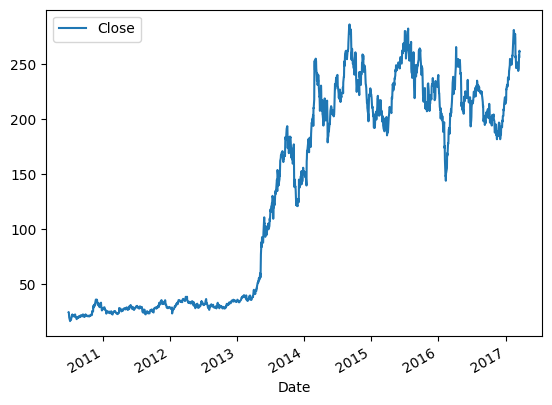

In [ ]:
df_close.plot(x = 'Date', y = 'Close')

In [ ]:
from statsmodels.tsa.stattools import adfuller


In [ ]:
#df['log_close'] = np.log(df['Close'])
df_close['Close']

,Close
0,23.889999
1,23.830000
2,21.959999
3,19.200001
4,16.110001
...,...
1687,246.169998
1688,258.000000
1689,255.729996
1690,262.049988


In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.7 MB/s eta 0:00:00


Checking for stationary

In [ ]:
def adfuller_hypothesis(stock):
  result = adfuller(stock)
  label = ['ADF T-test', 'p-value','no_of. lags', '# of observation']
  for key, label in zip(result, label):
    print(label + ': ' + str(key))

  if result[1] <= 0.05:
    print('null hypothesis is true,  stationary')
  else:
    print('null hypotheis is rejected, not stationary')



In [ ]:
adfuller_hypothesis(df_close['Close'])

ADF T-test: -0.8137329693176635
p-value: 0.8150547908640393
no_of. lags: 0
# of observation: 1691
null hypotheis is rejected, not stationary


In [ ]:
adfuller_hypothesis(df_close['Close'].diff().dropna())

ADF T-test: -39.84828024716408
p-value: 0.0
no_of. lags: 0
# of observation: 1690
null hypothesis is true,  stationary


<Axes: >

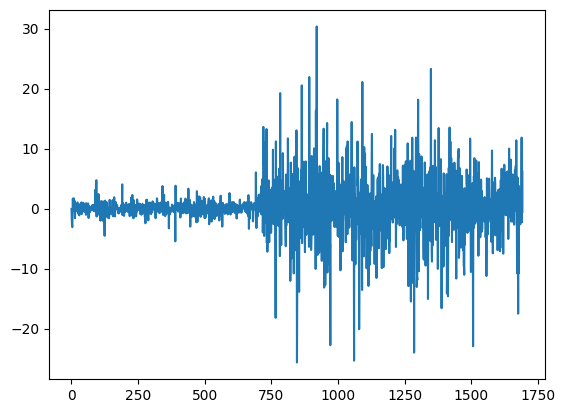

In [ ]:
#df_close['Close First difference'].plot()
df_close['Close'].diff().plot()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
import statsmodels.api as sm

AR best identified with pacf(p)

MA best identified with acf(q)

d is differencing

need to know p,d,q:

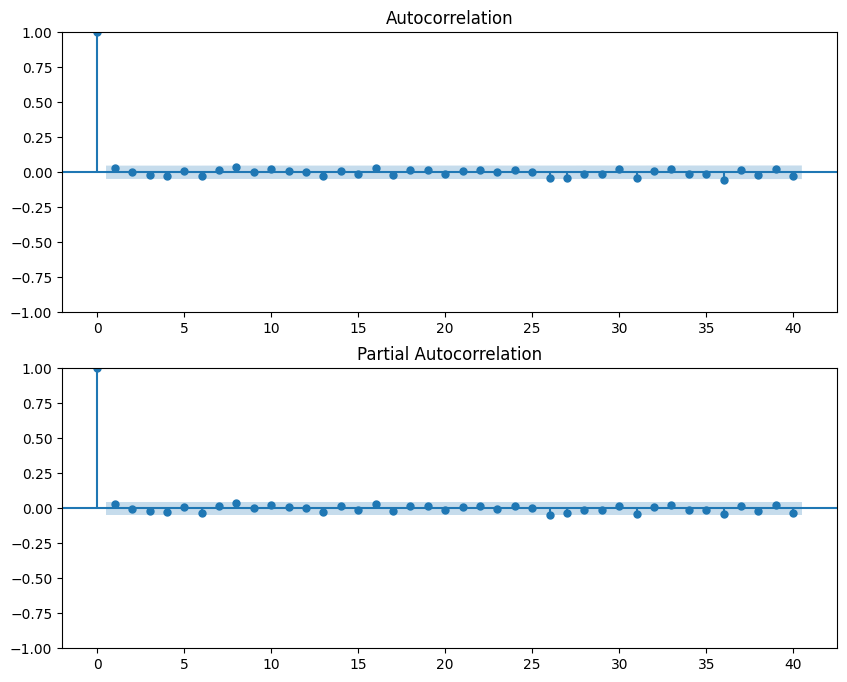

In [ ]:
fig = plt.figure(figsize = (10, 8))
ax1 = fig.add_subplot(211)
#fig = sm.graphics.tsa.plot_acf(df['Close First difference'].iloc[1:], lags =40,ax = ax1)
fig = sm.graphics.tsa.plot_acf(df['Close'].diff().iloc[1:], lags =40,ax = ax1)
ax2 =fig.add_subplot(212)
#fig = sm.graphics.tsa.plot_pacf(df['Close First difference'].iloc[1:], lags =40,ax = ax2)
fig = sm.graphics.tsa.plot_pacf(df['Close'].diff().iloc[1:], lags =40,ax = ax2)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

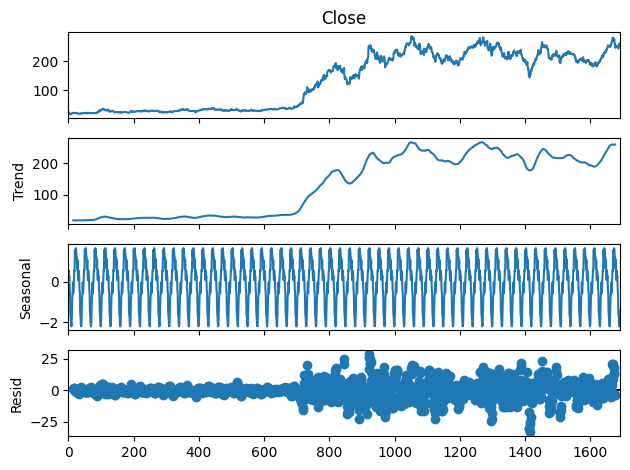

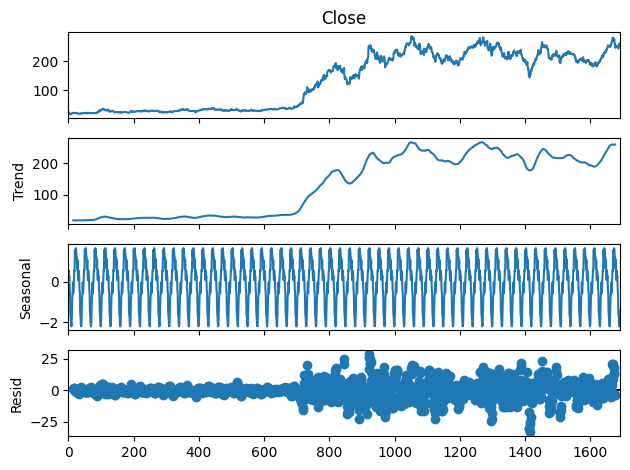

In [ ]:
decompose = seasonal_decompose(df_close['Close'], model = 'additive', period = 30)
decompose.plot()

In [ ]:
from statsmodels.tsa.stattools import acf, pacf

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
x_acf = pd.DataFrame(acf(df_close['Close']))
x_acf

,0
0,1.000000
1,0.997970
2,0.995867
3,0.993804
4,0.991749
5,0.989829
6,0.987908
7,0.986050
8,0.984138
9,0.982122


p = 23? Based on acf > 0.95

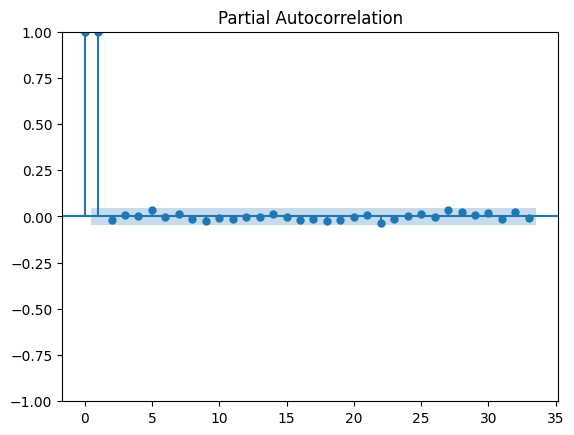

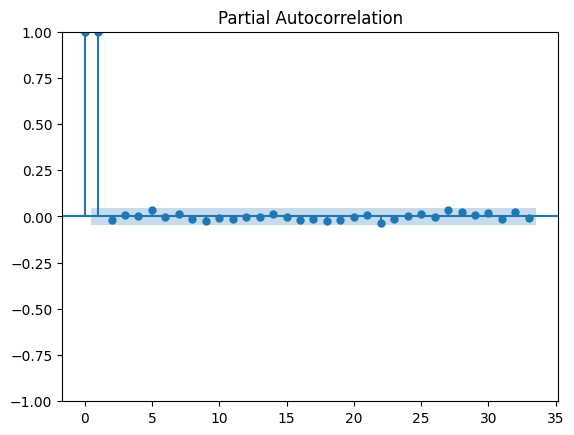

In [ ]:
plot_pacf(df['Close'], alpha = 0.05)

In [ ]:
n = int(len(df)*0.8)
train = df[:n]
test = df[n:]


In [ ]:
print(len(train))
print(len(test))

1353
339


In [ ]:
train['Close'].head()

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001


In [ ]:
model = auto_arima(df_close['Close'], start_p= 2, start_q = 23, seasonal = True, trace = True, max_q = 28, max_p = 5)

Performing stepwise search to minimize aic
 ARIMA(2,1,23)(0,0,0)[0] intercept   : AIC=9835.958, Time=80.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9805.682, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9806.104, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9806.102, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9805.414, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9808.103, Time=0.30 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 81.492 seconds


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1692
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4901.707
Date:                Fri, 09 Aug 2024   AIC                           9805.414
Time:                        19:56:41   BIC                           9810.847
Sample:                             0   HQIC                          9807.426
                               - 1692                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        19.2888      0.311     62.084      0.000      18.680      19.898
===================================================================================
Ljung-Box (L1) (Q):                   1.58   Jarque-Bera (JB):              3601.62
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):              28.11   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model = ARIMA(df_close['Close'], order = (0, 1, 0))
model_fit =model.fit()

In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1692
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -4901.707
Date:                Fri, 09 Aug 2024   AIC                           9805.414
Time:                        19:58:45   BIC                           9810.847
Sample:                             0   HQIC                          9807.426
                               - 1692                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        19.2888      0.311     62.084      0.000      18.680      19.898
Ljung-Box (L1) (Q):                   1.58   Jarque-Bera (JB):              3601.62
Prob(Q):                              0.21   Pr

In [ ]:
forecast = model_fit.predict(n_periods = 30)
forecast

,predicted_mean
0,0.000000
1,23.889999
2,23.830000
3,21.959999
4,19.200001
...,...
1687,243.690002
1688,246.169998
1689,258.000000
1690,255.729996


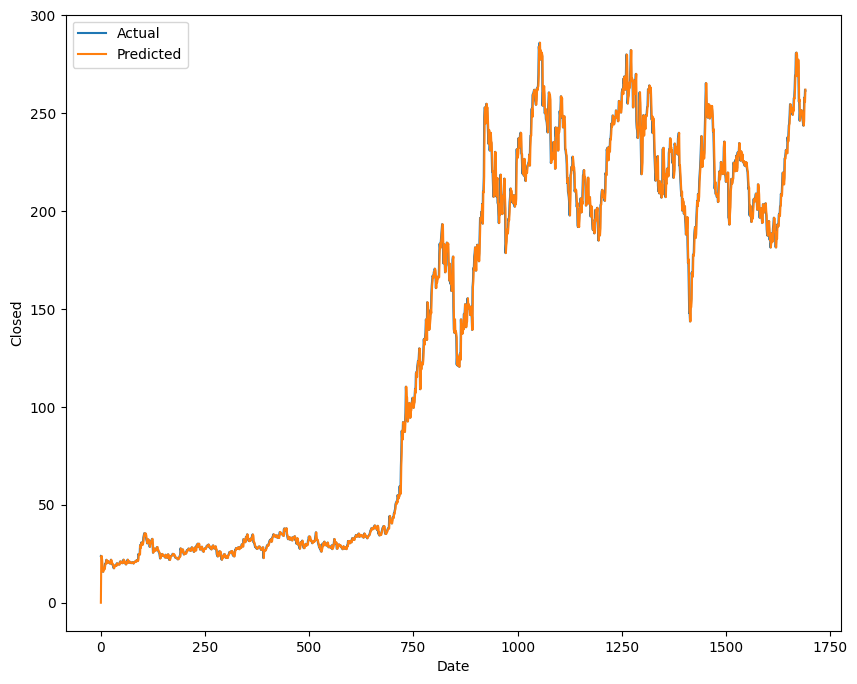

In [ ]:
plt.figure(figsize = (10, 8))
plt.plot(df['Close'], label = 'Actual')
plt.plot(forecast, label = 'Predicted')
plt.xlabel('Date')
plt.ylabel('Closed')
plt.legend(loc = 'upper left')
plt.show()

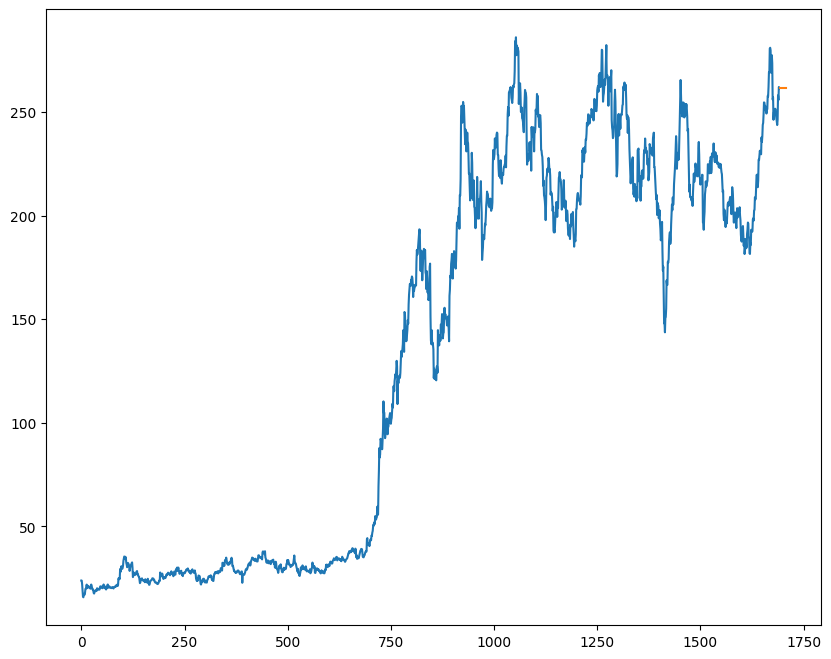

In [ ]:
future_forecast = model_fit.predict(len(df_close["Close"]), len(df_close["Close"])+ 15)
plt.figure(figsize = (10, 8))
plt.plot(df['Close'], label = 'Actual')
plt.plot(future_forecast, label = 'Predicted')